# Predicting Student Performance

- Name: Rahul Sankar

## Project Description:
This data is from Kaggle and is given in two .csv files, distinguished as data from two different Portuguese schools. The first task is to merge the two datasets through some data wrangling before conducting analysis. For the analysis, the dataset provides a wide range of 31 features to utilize in predicting the target output "G3", which is simply the final grade the student has earned in their final period.

**A complete description of all columns in this dataset are provided below:**

1. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. **sex** - student's sex (binary: "F" - female or "M" - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: "U" - urban or "R" - rural)
5. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. **Fjob**- father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. **guardian** - student's guardian (nominal: "mother", "father" or "other")
13. **traveltime** - home to school travel time (numeric: 1 - < 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1 <= n < 3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)
31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

**Note:** there are several (382) students that belong to both datasets (df_math & df_port). 

## Research Question:

**What is the final grade ("G3") of a student for the third session, given a variety of inputs. In other words, predict a student's performance in the third session.** Ideally, we would want to extend the usability of this model by applying it to students outside the dataset, in predicting their academic performance. The approach is to fit several predictive models (discussed below), after cleaning up the data and doing some feature engineering.


My pre-analysis expectations are that the models should definitely get very accurate predictions with the testing data given the wealth of information to work with for each observation (student). Additionally, I expect the best predictors to be the students grades in previous tests (G1, G2), number of previous absences/failures, and quality of family relationships/parent's cohabitation status. My prediction that G1 & G2 are especially correlated with G3 values.


The models will be evaluated and compared using MSE and R^2. Since MSE will give us the average number of points we are off for each prediction, it will be very useful in predicting overall effectiveness of models. R^2 is another standardized performance metric that accounts for the overall quality of the model in terms of attributing true performance capabilities versus inherent variation in the dataset. For the model to be at least somewhat accurate, I would expect a maximum MSE of 4.5 (given that the range of scores is 0-20).

## Model Selection Summary:

1. **Simple Linear Regression:** baseline regression to use in comparison to more advanced models.
2. **kNN** (k-nearest neighbors): another simple model to conduct well-rounded model testing.
3. **Lasso Regression:** given the large number of features (99), lasso regression helps with feature selection by shining light on the most valuable predictors and reducing impact of weaker ones.
4. **Support Vector Machine:** given the multi-dimensionality of the data, this model uses a linear kernel to predict performance.

## References:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Cortez, P. (no date) Paulo Cortez. Available at: https://pcortez.dsi.uminho.pt/ (Accessed: April 5, 2023). 

Verma, B. (2020) Student performance, Kaggle. Available at: https://www.kaggle.com/datasets/barkhaverma/student-performance (Accessed: April 5, 2023). 

## Initial Setup

In [33]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [34]:
# read in data from math school
df_math = pd.read_csv('student-mat.csv', delimiter=';')

# read in data from Portuguese school
df_port = pd.read_csv('student-por.csv', delimiter=';')

In [35]:
# students in math school
df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# students in Portuguese school
df_port

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Data Wrangling

In [5]:
# merge both data sets and remove duplicate data
merge_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
df = pd.concat([df_math, df_port]).drop_duplicates(subset=merge_cols).reset_index(drop=True)

# look for issues in data
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0
658,MS,F,18,R,GT3,T,2,2,services,other,...,4,2,1,1,1,4,5,14,14,15
659,MS,F,18,R,LE3,A,1,2,at_home,other,...,4,3,4,1,4,5,0,16,15,15
660,MS,F,19,R,GT3,T,1,1,at_home,other,...,4,3,3,1,1,3,4,7,8,9


In [7]:
# additional checks to ensure data is valid:

# check for missing or null values
print(f"Null/missing values: {df.isnull().values.any()}")
# check for duplicate rows
print(f"Duplication: {df.duplicated().any()}")
# check for negative values
print(f"Negative values: {(df.select_dtypes(include=['float', 'int']) < 0).any().any()}")
# check for non-sensible age values
print(f"Min Age: {df['age'].min()}")
print(f"Max Age: {df['age'].max()}")
# check for non-sensible grade values
print(f"G1 > 20: {(df['G1']>20).any()}")
print(f"G2 > 20: {(df['G2']>20).any()}")
print(f"G3 > 20: {(df['G3']>20).any()}")

# ensure appropriate data types:
df['Medu'] = df['Medu'].astype('category')
df['Fedu'] = df['Fedu'].astype('category')
df['traveltime'] = df['traveltime'].astype('category')
df['studytime'] = df['studytime'].astype('category')
df['famrel'] = df['famrel'].astype('category')
df['freetime'] = df['freetime'].astype('category')
df['goout'] = df['goout'].astype('category')
df['Dalc'] = df['Dalc'].astype('category')
df['Walc'] = df['Walc'].astype('category')
df['health'] = df['health'].astype('category')
print(f"\n{df.dtypes}")

print("\nAll checks passed!")

Null/missing values: False
Duplication: False
Negative values: False
Min Age: 15
Max Age: 22
G1 > 20: False
G2 > 20: False
G3 > 20: False

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu          category
Fedu          category
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime    category
studytime     category
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object

All checks passed!


## Exploratory Data Analysis (EDA):

*See below for visualizations and addtional insight on data.*

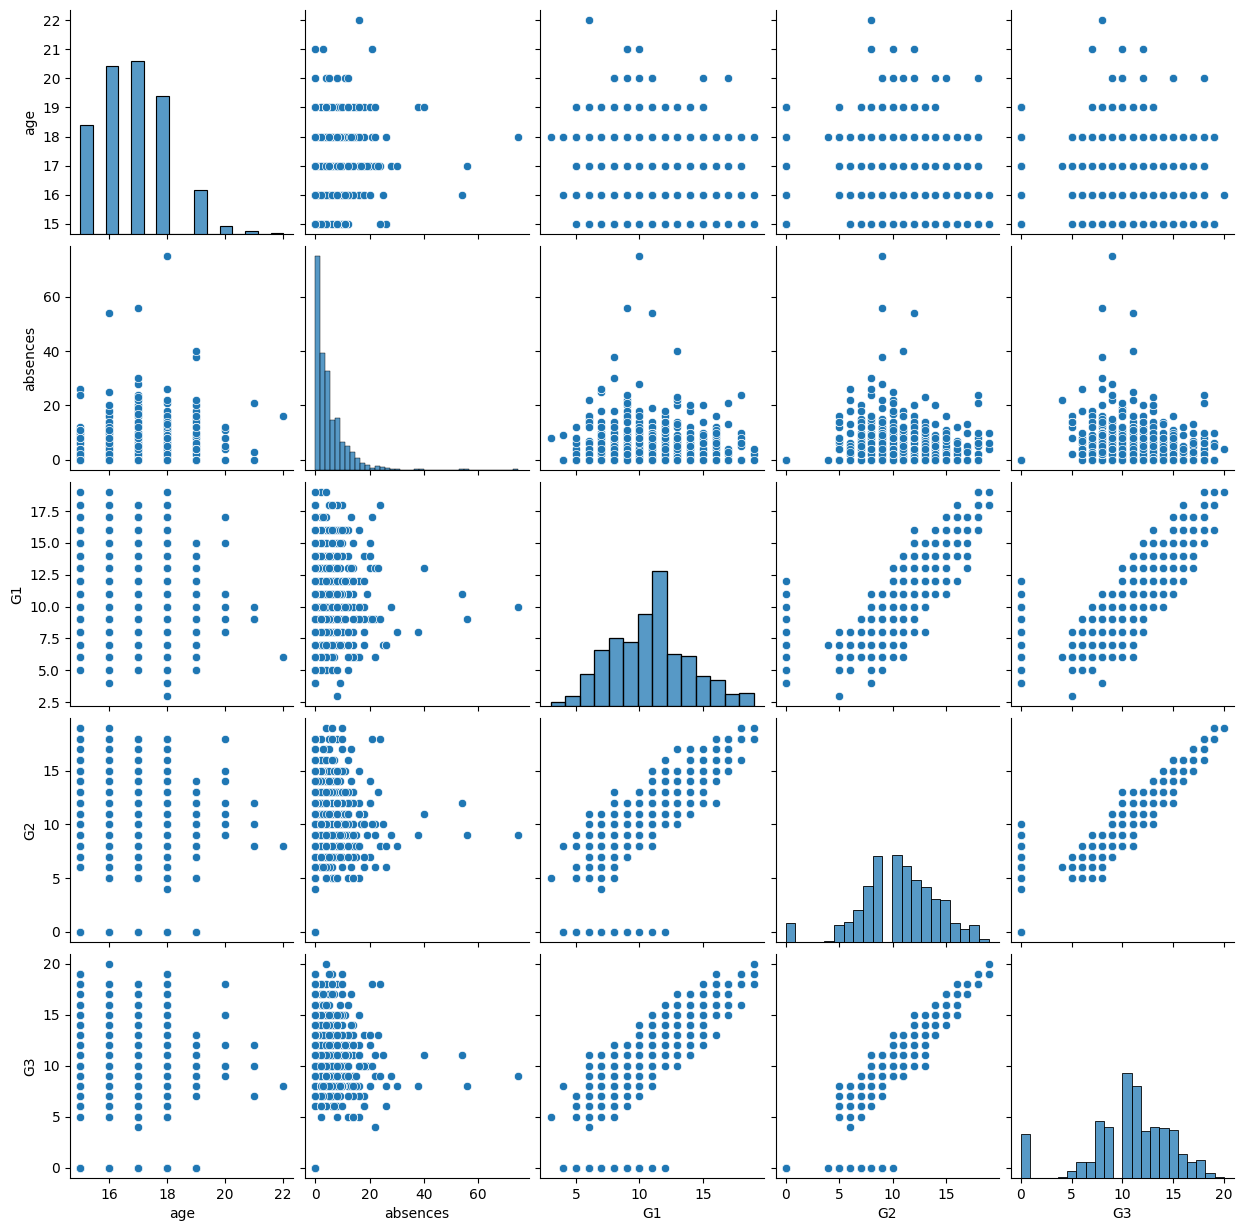

In [7]:
sns.pairplot(df[['age', 'absences', 'G1', 'G2', 'G3']])

**Takeaway:** Scoring higher on G1 & G2 is positively related to scoring higher on G3. G1, G2, & G3 seem to be normally distributed while "age" is slightly right skewed, and "absences" are very right skewed.

In [8]:
## correlation matrix
corr_matrix = df[['age', 'absences', 'G1', 'G2', 'G3']].corr()
print(corr_matrix)

               age  absences        G1        G2        G3
age       1.000000  0.168313 -0.113206 -0.130408 -0.127446
absences  0.168313  1.000000 -0.050925 -0.042650 -0.004601
G1       -0.113206 -0.050925  1.000000  0.841436  0.796569
G2       -0.130408 -0.042650  0.841436  1.000000  0.913548
G3       -0.127446 -0.004601  0.796569  0.913548  1.000000


**Takeaway:** Following variables are highly positively correlated: G2 & G3 (0.91), G1 & G3 (0.79), and G1 & G2 (0.84).

There are signs of **multicollinearity within predictive features (G1 & G2)** which could be a problem for some models such as the simple linear regression. More advanced models such as lasso regression will be able to address this.

Text(0.5, 1.0, 'Distribution of Final Grades')

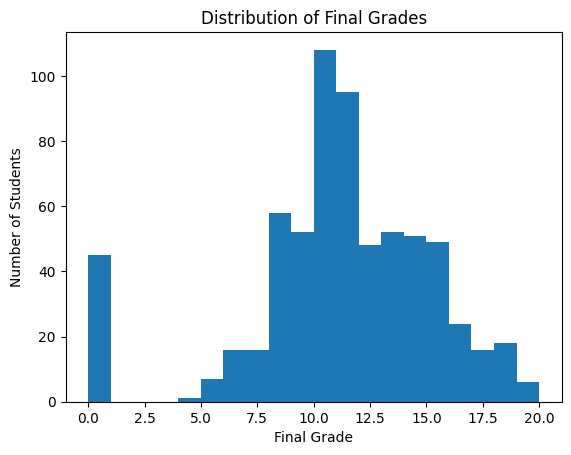

In [8]:
plt.hist(df['G3'], bins=20)
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')

**Takeaway:** The distribution of final grades seems normal with a peak around 11 and potential outliers at 0

Text(0, 0.5, 'Final Grade')

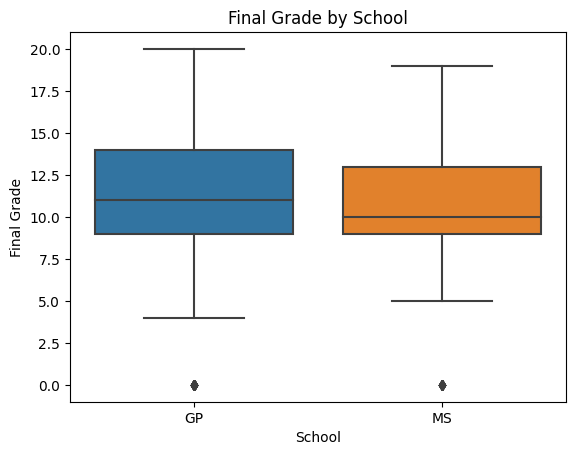

In [10]:
sns.boxplot(x='school', y='G3', data=df)
plt.title('Final Grade by School')
plt.xlabel('School')
plt.ylabel('Final Grade')

**Takeaway:** There are outliers in both schools that scored extremely low on G3 (0.00). This warrants additional analysis of models with and without outliers.

Text(0, 0.5, 'Final Grade')

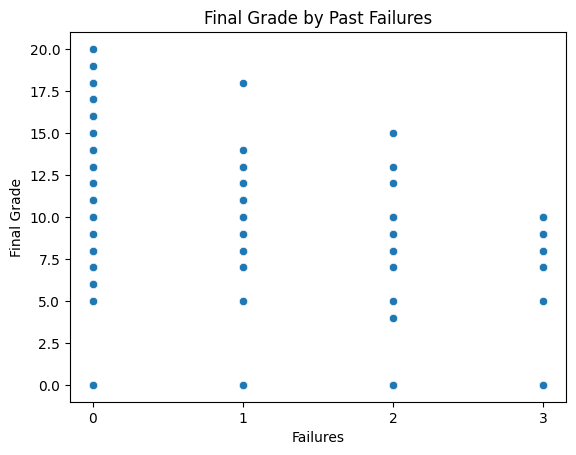

In [11]:
sns.scatterplot(x='failures', y='G3', data=df)
plt.title('Final Grade by Past Failures')
plt.xlabel('Failures')
plt.xticks([0,1,2,3])
plt.ylabel('Final Grade')

**Takeaway:** As one would expect, the more failures a student has made, the worse their final grade seems to be. Overall, there seems to be a negative correlation.

Text(0, 0.5, 'Final Grade')

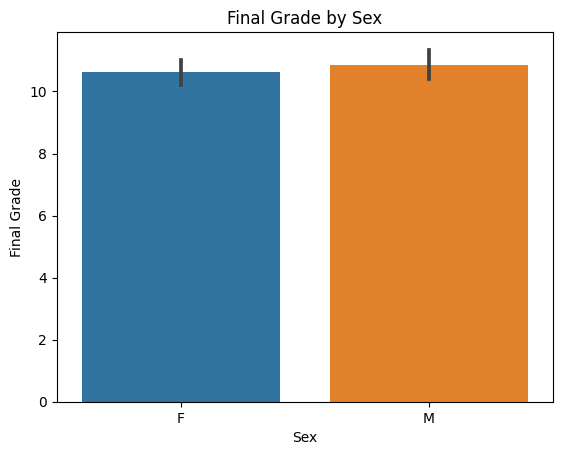

In [9]:
sns.barplot(x='sex', y='G3', data=df)
plt.title('Final Grade by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade')

**Takeaway:** The average grade for the male sex and the female sex are very similar.

## Feature Engineering & Data Preprocessing

In [10]:
## Feature engineering: 
# Adding binary feature [1,0] to see if both parents are employed 
#       BothParentsEmpd. True = 1, False = 0

df.loc[(df['Mjob'] != "at_home") & (df['Fjob'] != "at_home"), "BothParentsEmpd"] = 1
df['BothParentsEmpd'].fillna(0, inplace=True)
df['BothParentsEmpd'] = df['BothParentsEmpd'].astype(int).astype('category')
df['BothParentsEmpd']

0      0
1      0
2      0
3      1
4      1
      ..
657    0
658    1
659    0
660    0
661    1
Name: BothParentsEmpd, Length: 662, dtype: category
Categories (2, int64): [0, 1]

In [11]:
# one-hot encoding
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                    'nursery', 'higher', 'internet', 'romantic', 'Medu', 'Fedu', 'traveltime',
                    'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                    'BothParentsEmpd']
df = pd.get_dummies(df, columns=categorical_cols)
print(f"# of columns: {len(df.dtypes)}")
print(df.dtypes)

# of columns: 99
age                  int64
failures             int64
absences             int64
G1                   int64
G2                   int64
                     ...  
health_3             uint8
health_4             uint8
health_5             uint8
BothParentsEmpd_0    uint8
BothParentsEmpd_1    uint8
Length: 99, dtype: object


In [12]:
## Remove outlier test scores
# Assumption is that outlier students significantly skew results of linear regression
df = df[df['G3'] >= 2]

*Tested all models with and without outliers, and **removing the outliers made significant improvements on all models**. For example, the MSE of the initial lasso regression model decreased by nearly 50% from 1.389 to 0.746. Additionally, non-intuitive coefficient signs of certain features became more appropriate. For instance, the initial lasso model had impactful positive coefficients for both absences and weekend drinking, which is typically not what one would assume. After correcting outliers, the sign of coefficients for each feature became more reasonable.*

## Model Selection

In [13]:
## Function to help print top 10 features for models used later on
def printBestNFeatures(coef, features, n = -1):
    if n <= 0:
        n = len(features)
    # map coefs to feature names and sort in reverse absolute value order
    coef_map = list(zip(coef, features))
    coef_map = sorted(coef_map, key=lambda x: abs(x[0]), reverse=True)

    idx = 1
    for (coef, feature) in coef_map[:n]:
        print(f"{idx}) {feature}: {round(coef,5)}")
        idx += 1

### Simple Linear Regression
*Baseline predictive model*

In [16]:
X = df.drop(['G3'], axis=1)
y = df['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Linear regression
slr = LinearRegression()
slr.fit(X_train, y_train)
yPred = slr.predict(X_test)

# Performance metrics:
mse = mean_squared_error(y_test, yPred)
r2 = r2_score(y_test, yPred)

print("R^2: ", r2)
print('\nMSE:', mse)
print("\nTop 10 features:")
printBestNFeatures(slr.coef_, X_train.columns, 10)

R^2:  0.9070915695443731

MSE: 0.7893832826953111

Top 10 features:
1) school_MS: -1039059524561.7946
2) school_GP: -1039059524561.7931
3) Fedu_4: -756492509583.6124
4) Fedu_3: -756492509583.6036
5) Fedu_2: -756492509583.5951
6) Fedu_1: -756492509583.4458
7) Fedu_0: -756492509583.3212
8) traveltime_4: 443472508265.65063
9) traveltime_2: 443472508265.2346
10) traveltime_1: 443472508265.19055


**Commentary:** Despite having reasonable performance metrics for MSE and R^2, the coefficients of the features are extremely large. This is nonsensical and a common warning sign for a model that is overfitting all the noise in the data. It also hints at issues of multicollinearity which can be addressed with **lasso regression**.

### K Nearest Neighbors (kNN)

In [18]:
X = df.drop('G3', axis=1)
y = df['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# kNN regressor with k = 19
kNN = KNeighborsRegressor(n_neighbors=9)
kNN.fit(X_train, y_train)
yPred = kNN.predict(X_test)

# Performance metrics:
r2 = r2_score(y_test, yPred)
mse = mean_squared_error(y_test, yPred)
print("R^2: ", r2)
print("MSE:", mse)

R^2:  0.8703382398524264
MSE: 1.101652727996814


**Commentary:** After testing various k-folds, the best k-fold variation seemed to be 9 to best fit the data. The MSE is low at 1.102 and R^2 is also good at 0.87. This model provides simplicity while sacrificing some performance (but not much).

### Lasso Regression
**Description:** Lasso regression could help with feature selection and certainly worthwhile given the 99 feature columns.

In [20]:
# LASSO REGRESSION

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('G3', axis=1), df['G3'], test_size=0.2, random_state=123)

# create lasso and fit model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Performance metrics:
R2_Score = lasso.score(X_test, y_test)
yPred = lasso.predict(X_test)
mse = mean_squared_error(y_test, yPred)

print(f'R^2: {R2_Score}')
print(f"\nMSE: {mse}\n")
printBestNFeatures(lasso.coef_, X_train.columns, 10)

R^2: 0.9121811299457593

MSE: 0.7461405556637618

1) G2: 0.8256
2) G1: 0.14752
3) absences: -0.01649
4) age: 0.0
5) failures: -0.0
6) school_GP: -0.0
7) school_MS: 0.0
8) sex_F: 0.0
9) sex_M: -0.0
10) address_R: -0.0


**Commentary:** The lasso model has achieved an **impressive R^2 value of 0.912** and a **very low MSE of 0.746**. **A student's score on "G2" (second period grade) is the most impactful predictor** for "G3" with the highest coefficient of 0.826, with the **next best feature being "G1"** with a coefficient of 0.148. The third most impactful predictor is **absences** with a negative coefficient of -0.017 as one would expect. Note that the coefficients are not normalized, so scale of features will impact its importance in prediction. Multiple alpha values were also tested with 0.1 receiving the best results.

Lastly, despite providing 99 features to utilize, the lasso model only primarily uses 3 features with the coefficients of other features being brought down very close to 0 since they may not correlate as much with G3.

Ultimately, in order to improve this model's usefulness in a real-life context, I would like to **train the model *without* "G2"** and analyze its performance. In reality, it would be more insightful to accurately predict a student's success earlier in time before they have even taken the second period exam "G2".


In [22]:
# LASSO REGRESSION without G2!

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['G2','G3'], axis=1), df['G3'], test_size=0.2, random_state=123)

# Create lasso and fit
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Performance metrics:
R2_Score = lasso.score(X_test, y_test)
yPred = lasso.predict(X_test)
mse = mean_squared_error(y_test, yPred)

print(f'R^2: {R2_Score}\n')
print(f"MSE: {mse}\n")
printBestNFeatures(lasso.coef_, X_train.columns, 10)

R^2: 0.7514600467072747

MSE: 2.1116844106504695

1) G1: 0.85889
2) absences: -0.04207
3) age: -0.0
4) failures: -0.0
5) school_GP: 0.0
6) school_MS: -0.0
7) sex_F: 0.0
8) sex_M: -0.0
9) address_R: -0.0
10) address_U: 0.0


**Commentary:** With this Lasso model being trained *without* the G2 feature, we have a notable increase in MSE from the initial error of 0.746 to 2.112. Additionally, the R^2 value has also decreased to 0.75 from 0.91.

The most impactful predictor is "G1" with a coefficient of 0.859, followed by the number of absences which has a coefficient -0.042. Note that this model "utilizes" **only 2 features** with impactful coefficients whereas the first model used about 3. Essentially, this second model is using the same features as the first model minus G2.

Despite its shortcomings in performance, **there is still some legitimacy behind this model** in the case that we would like to predict a student's performance earlier in time as this could be useful in a real-life context.

It's evident that removing previous grades such as "G2" has a strong negative impact on the model's accuracy on predicting G3. However, I will also build a **lasso model without G1** to see if the model can accurately predict scores even earlier in time.


In [24]:
# LASSO REGRESSION without G2 & G1!

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['G1','G2','G3'], axis=1), df['G3'], test_size=0.2, random_state=123)

# Create lasso and fit
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Performance metrics:
score = lasso.score(X_test, y_test)
yPred = lasso.predict(X_test)
mse = mean_squared_error(y_test, yPred)

print(f'R^2: {score}\n')
print(f"MSE: {mse}\n")
printBestNFeatures(lasso.coef_, X_train.columns, 10)

R^2: 0.13324547523637342

MSE: 7.364256706238304

1) failures: -1.08744
2) schoolsup_no: 0.7242
3) Medu_4: 0.44199
4) Medu_1: -0.34074
5) famsup_no: 0.2956
6) BothParentsEmpd_0: -0.27836
7) goout_2: 0.27153
8) reason_reputation: 0.25858
9) Walc_1: 0.19025
10) internet_no: -0.16672


**Commentary:** Needless to say, this is a **very poor model**. Without information on G1 and G2, MSE is very high at 7.36 (especially poor since the range of scores is only 0 to 20). R^2 is also very poor at 0.13 and this model may only be marginally more useful than someone making educated guesses. With the information available in this dataset, we are **not able to accuracy predict G3 scores before the student has at least received a grade for G1** using Lasso.

Also, the **signs (+/-) of some features do not make intuitive/logical sense**. This model associates having no additional school support as the greatest positive impact on student performance. Having no family support is also associated with a positive impact on student performance.


### Support Vector Machine
**Desc:** Potentially useful for multi-dimensional data

In [26]:
## normalize data - necessary to accurately address varying scale of input features
def build_normalization_dict(df, target_col):
    """Collect the (min, max) values of each column, except the
    target column.
    """
    dict_normalize = {}

    for column in df.columns:
        if column != target_col:
            val = (df[column].min(), df[column].max())
            dict_normalize[column] = val

    return dict_normalize

def normalize(df, dict_normalize, target_col):
    """Normalize a dataframe, setting all values to the range [0, 1]
    using (min, max) values in dict_normalize. Do not normalize target_col."""

    for column in df.columns:
        if column != target_col:
            rng = dict_normalize[column][1] - dict_normalize[column][0] 
            df[column] = (df[column] - dict_normalize[column][0]) / rng
    
    return df

# Define the target column as a string
target = "G3"

# Collect normalization values
dict_normalize = build_normalization_dict(df, target)

# Normalize the dataframe
df = normalize(df, dict_normalize, target)

In [29]:
## SVM Model

X = df.drop(['G3'], axis=1)
y = df['G3']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Create an SVM model and fit
svm = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm.fit(X_train, y_train)
yPred = svm.predict(X_test)

# Performance metrics:
r2 = r2_score(y_test, yPred)
mse = mean_squared_error(y_test, yPred)

print("R^2: ", r2)
print('\nMSE:', mse)
print("\nTop 25 features:")
printBestNFeatures(svm.coef_.ravel(), X_train.columns, 25)

R^2:  0.8955801811442388

MSE: 0.887188159164714

Top 25 features:
1) G2: 10.10776
2) G1: 3.29599
3) absences: -1.19247
4) Dalc_5: -0.56189
5) Dalc_4: 0.50996
6) age: 0.40632
7) failures: -0.3548
8) Walc_2: -0.26672
9) Fjob_teacher: 0.25138
10) Mjob_at_home: -0.207
11) traveltime_4: 0.20314
12) health_3: -0.19942
13) freetime_2: 0.1719
14) Mjob_teacher: 0.15544
15) freetime_1: -0.15463
16) Dalc_1: 0.15236
17) Fedu_1: 0.14037
18) famrel_4: -0.13617
19) health_4: 0.13526
20) guardian_other: -0.12891
21) goout_2: 0.12863
22) nursery_no: 0.12738
23) nursery_yes: -0.12738
24) schoolsup_no: 0.12716
25) schoolsup_yes: -0.12716


**Commentary:** This SVM model with a linear kernel has also achieved an impressive R^2 at 0.896 and MSE at 0.887, which is only slightly higher than the first lasso model at 0.75 MSE. Unlike the lasso models, this model **utilizes much more features in making predictions** as seen by the number of features with notable sized coefficients. 

As such, the more diverse utilization of features in this model leads me to believe that this model is **overall more robust** than the lasso model in making future predictions. Especially when the lasso model only uses 2-3 features of the 99 potentially useful features, it may be harder to extend its applicability to other contexts. There also seems to be a **greater proportion of features that are appropriately positive & negative** as one would expect in reality in SVM versus lasso.

The most impactful features were G2, G1, and # of absences (similar to all other models) with normalized coefficients of 10.12, 3.3, and -1.2 respectively.


# Conclusion:
**The overall best model** with the lowest MSE and the highest R^2 was the **initial lasso model** (MSE = 0.75, R^2 = 0.912). **The SVM model also deserves a notable mention** as it seemed more robust in predictive power despite only being slightly lower in predictive performance. This is especially evident since the first lasso model only really uses 3 features while the SVM is much more comprehensive. Using more features does not always mean one model is better than another, but in this situation, the difference is very notable.

The **second lasso model** that seeked to predict the student performance without the G2 feature **was not as impressive but also not meritless**. The MSE was 2.11 and R^2 was 0.75. This model could potentially be useful to get a fairly accurate idea of a student's performance earlier in time,with the tradeoff being loss in overall accuracy.


Lastly, some **constraints & concessions** to be mindful of:
- This data is from 2008 and is specific to two Portuguese schools in Brazil. Extending the application of these models beyond this context could be very erroneous.
- The data from the two schools were combined under the assumption that all other factors between the two schools (than the ones observed) were similar in nature and not confounding.

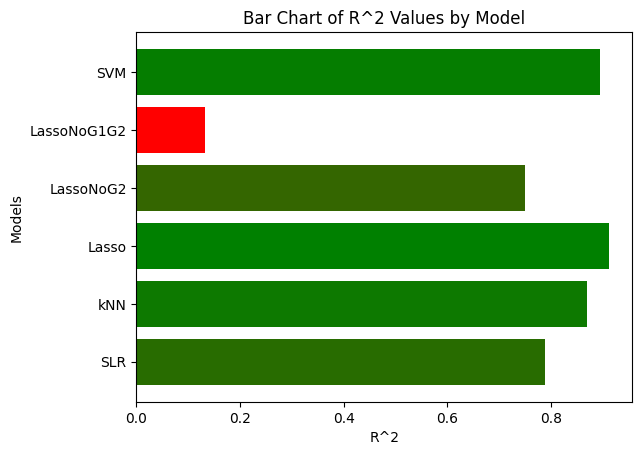

In [30]:
## Barchart of R^2 Values
model_labels = ['SLR', 'kNN', 'Lasso', 'LassoNoG2', 'LassoNoG1G2', 'SVM']
R2_values = [0.789, 0.870, 0.912, 0.751, 0.133, 0.896]

norm = mcolors.Normalize(vmin=min(R2_values), vmax=max(R2_values))
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "green"])

plt.barh(model_labels, R2_values, color=cmap(norm(R2_values)))
plt.title('Bar Chart of R^2 Values by Model')
plt.xlabel('R^2')
plt.ylabel('Models')

plt.show()

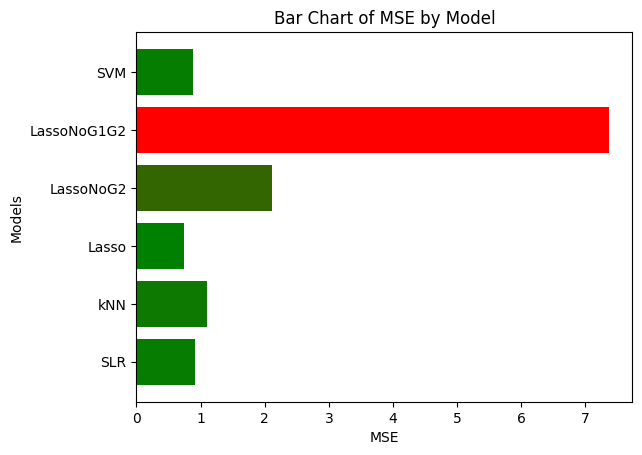

In [31]:
## Barchart of MSE Values
model_labels = ['SLR', 'kNN', 'Lasso', 'LassoNoG2', 'LassoNoG1G2', 'SVM']
MSE_values = [0.907, 1.101, 0.746, 2.112, 7.364, 0.887]

norm = mcolors.Normalize(vmin=min(MSE_values), vmax=max(MSE_values))
cmap = mcolors.LinearSegmentedColormap.from_list("", ["green", "red"])

plt.barh(model_labels, MSE_values, color=cmap(norm(MSE_values)))
plt.title('Bar Chart of MSE by Model')
plt.xlabel('MSE')
plt.ylabel('Models')

# Show the plot
plt.show()

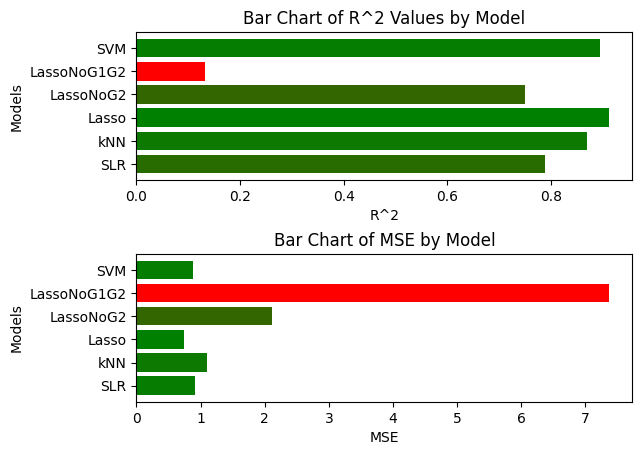

In [32]:
model_labels = ['SLR', 'kNN', 'Lasso', 'LassoNoG2', 'LassoNoG1G2', 'SVM']
R2_values = [0.789, 0.870, 0.912, 0.751, 0.133, 0.896]
MSE_values = [0.907, 1.101, 0.746, 2.112, 7.364, 0.887]

## Barchart of R^2 Values
plt.subplot(2, 1, 1)
norm = mcolors.Normalize(vmin=min(R2_values), vmax=max(R2_values))
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "green"])

plt.barh(model_labels, R2_values, color=cmap(norm(R2_values)))
plt.title('Bar Chart of R^2 Values by Model')
plt.xlabel('R^2')
plt.ylabel('Models')

## Barchart of MSE Values
plt.subplot(2, 1, 2)
model_labels = ['SLR', 'kNN', 'Lasso', 'LassoNoG2', 'LassoNoG1G2', 'SVM']
MSE_values = [0.907, 1.101, 0.746, 2.112, 7.364, 0.887]

norm = mcolors.Normalize(vmin=min(MSE_values), vmax=max(MSE_values))
cmap = mcolors.LinearSegmentedColormap.from_list("", ["green", "red"])

plt.barh(model_labels, MSE_values, color=cmap(norm(MSE_values)))
plt.title('Bar Chart of MSE by Model')
plt.xlabel('MSE')
plt.ylabel('Models')

plt.subplots_adjust(hspace=.5)

plt.show()